### 死亡率连续化
年平均死亡率为$0.8 \Rightarrow$

设$x = x_0\exp(-\lambda t)$，$t$的单位是年$\lambda = \ln 5,\frac {\mathrm d x}{\mathrm d t} = -\lambda x$

### 捕捞强度
四龄鱼捕捞强度系数 $k\Rightarrow$三龄鱼$0.42k$

## 前八个月
设四种鱼组成的向量为$\vec x$,得到$$-\frac{\mathrm d \vec x}{\mathrm d t} = k \mathbf C \vec x + \lambda \vec x$$

$$ \mathbf C = \begin{pmatrix}0&0&0&0\\0&0&0&0\\0&0&0.42&0\\0&0&0&1\end{pmatrix}$$

### 后四个月
设卵为$y$，对一条鱼而言，$$\frac {\mathrm d y}{\mathrm d t} = \mu$$

$$\frac {\mathrm d y}{\mathrm d t} = \mu \begin{pmatrix} 0 & 0 & 1.109\times10^5/2&1.109\times10^5\end{pmatrix} \vec x$$

$$-\frac{\mathrm d \vec x}{\mathrm d t} =\lambda \vec x$$


取所有的单位时间为年，则$\mu = 3$

### 过年
$y = 0$
$$\vec x = \mathbf T \vec x +\begin{pmatrix} f(y)&0&0&0\end{pmatrix}^T$$ 
$$f(y) = \frac{1.22\times 10 ^{11}y}{1.22\times 10 ^{11} + y}$$

## 求解：

### $t \in [0,2/3]$

$$\frac {\mathrm dx}{\mathrm dt} = \mathbf A_1$$

$$\mathbf A_1 = \begin{pmatrix}
-\ln5 & 0 & 0 & 0 \\
0 & -\ln5 & 0 & 0 \\
0 & 0 & -0.42k-\ln5 & 0 \\
0 & 0 & 0 & -k-\ln5 \\
\end{pmatrix}$$

$$\vec x_1 =  \exp(+2\mathbf A_1 / 3)\vec x_0$$ 

$$\frac {\mathrm dx}{\mathrm dt} = \mathbf A_2$$

$$\mathbf A_2 = \begin{pmatrix}
-\ln5 & 0 & 0 & 0 \\
0 & -\ln5 & 0 & 0 \\
0 & 0 & -\ln5 & 0 \\
0 & 0 & 0 & -\ln5 \\
\end{pmatrix}$$

$$\vec x_2 =  \exp(-\mathbf A_2 / 3)\vec x_1$$

$$\vec x(t') =  \exp(-\mathbf A_2 t')\vec x_1,t' = t-2/3$$

$$y = \int_0^{1/3}3 \begin{pmatrix} 0 & 0 & 1.109\times10^5/2&1.109\times10^5\end{pmatrix} \vec x(t') \mathrm dt'$$

$$y = \int_0^{1/3}3 \begin{pmatrix} 0 & 0 & 1.109\times10^5/2&1.109\times10^5\end{pmatrix} \vec x_1 \exp(-\mathbf A_2 t') \mathrm dt'$$

$$y = (3 \begin{pmatrix} 0 & 0 & 1.109\times10^5/2&1.109\times10^5\end{pmatrix} \vec x_1 )\int_0^{1/3} \exp(-\mathbf A_2 t') \mathrm dt'$$

$$y = (3 \begin{pmatrix} 0 & 0 & 1.109\times10^5/2&1.109\times10^5\end{pmatrix} A_2^{-1}(\mathbf I - \exp(-\mathbf A_2/3))) \vec x_1 )  $$

$$\mathbf B = (3 \begin{pmatrix} 0 & 0 & 1.109\times10^5/2&1.109\times10^5\end{pmatrix} A_2^{-1}(\mathbf I - \exp(-\mathbf A_2/3)))$$

$$y = \mathbf B \vec x_1$$

In [1]:
%solve for B

A_2 = -log(5)*eye(4)
arr = [0 0 1.109e5/2 1.109e5]
B  = 3 * arr * A_2^(-1) * (eye(4) - expm(-A_2/3))'
B * 0.04


A_2 =

   -1.6094         0         0         0
         0   -1.6094         0         0
         0         0   -1.6094         0
         0         0         0   -1.6094


arr =

           0           0       55450      110900


B =

   1.0e+05 *

         0         0    0.7338    1.4676


ans =

   1.0e+03 *

         0         0    2.9353    5.8706



### 解方程

$$\vec x_0 = \mathbf T \exp(-\mathbf A_2 / 3 -2\mathbf A_1 / 3)\vec x_0 +\begin{pmatrix} f(\mathbf B \exp(-2\mathbf A_1 / 3)\vec x_0)&0&0&0\end{pmatrix}^T$$ 

$$\mathbf A = -\mathbf A_2 / 3 -2\mathbf A_1 / 3 = \begin{pmatrix}
-\ln5 & 0 & 0 & 0 \\
0 & -\ln5 & 0 & 0 \\
0 & 0 & -\ln5-0.84k/3 & 0 \\
0 & 0 & 0 & -\ln5-2k/3 \\
\end{pmatrix}$$

$$\exp(\mathbf A) = \begin{pmatrix}
0.2 & 0 & 0 & 0 \\
0 & 0.2 & 0 & 0 \\
0 & 0 & 0.2\exp(-0.84k/3) & 0 \\
0 & 0 & 0 & 0.2\exp(-2k/3) \\
\end{pmatrix}$$

$$ \mathbf T = \begin{pmatrix} 
0 & 0 & 0 & 0 \\ 1& 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\0 & 0 & 1 & 1 
\end{pmatrix}$$

$$\mathbf T \exp\mathbf A = \begin{pmatrix}
0 & 0 & 0 & 0\\
0.2 & 0 & 0 & 0 \\
0 & 0.2 & 0 & 0 \\
0 & 0 & 0.2\exp(-0.84k/3) & 0.2\exp(-2k/3)
\end{pmatrix}$$

$$ x_4 =  0.2\exp(-0.84k/3)x_3 + 0.2\exp(-2k/3)x_4 $$

$$ x_4 =  0.008\exp(-0.84k/3)x_1 + 0.2\exp(-2k/3)x_4 $$

$$x_1 = f(\mathbf B \exp(-2\mathbf A_1 / 3)\vec x_0) = f(2.9353e3 x_1 + 1.4676e5 x_4)$$

$$f(y) = \frac{1.22\times 10 ^{11}y}{1.22\times 10 ^{11} + y}$$

$$ (1-0.2\exp(-2k/3))x_4 =  0.008\exp(-0.84k/3)x_1 $$

$$x_1 = f((2.9353e3+1.1741e3\exp(-0.84k/3) / (1-0.2\exp(-2k/3)))x_1)$$

$$2.9353e3+1.1741e3\exp(-0.84k/3) / (1-0.2\exp(-2k/3) = g(k)$$

$$x_1 = f(g(k)x_1)$$

$$1/x_1 = 1/1.22e11 + 1/(g(k)x_1)$$
$$(1-1/g(k))=x_1/1.22e11$$

$$x_1 = 1.22\times 10^{11}(1-1/g(k)))$$

$$2.9353\times 10^3+1.1741\times 10^3exp(−0.84k/3)/(1−0.2exp(−2k/3)=g(k)$$

### 收获

$$\frac {\mathrm dz}{\mathrm dt} = k\mathbf C \vec x$$

$$z = k\mathbf C\int_0^{2/3}\exp(-\mathbf A_1t)\mathrm dt\vec x_0$$

$$ z = k\mathbf C  A_1^{-1} (1-\exp(-2\mathbf A_1/3))\vec x_0$$

$$ \mathbf C = \begin{pmatrix}0&0&0&0\\0&0&0&0\\0&0&0.42&0\\0&0&0&1\end{pmatrix}$$

$$\mathbf A_1 = \begin{pmatrix}
-\ln5 & 0 & 0 & 0 \\
0 & -\ln5 & 0 & 0 \\
0 & 0 & -0.42k-\ln5 & 0 \\
0 & 0 & 0 & -k-\ln5 \\
\end{pmatrix}$$

$$x_1 = 1.22\times 10^{11}(1-1/g(k)))$$

$$2.9353\times 10^3+1.1741\times 10^3exp(−0.84k/3)/(1−0.2exp(−2k/3)=g(k)$$\

$$ x_3 = 0.04x_1,x_2 = 0.2x_1$$

$$ x_4 =  0.008\exp(-0.84k/3)/(1-0.2\exp(-2k/3))x_1 $$

In [2]:
build_from_x_1 = @(x_1,k) [x_1;0.2 * x_1;0.04 * x_1;0.008 * exp(-0.84 * k / 3) / (1 - 0.2 * exp(-2 * k / 3)) * x_1];
g = @(k) 2.9353e3 * exp(-2 / 3 * (0.42 * k + log(5))) + 1.1741e3 * exp(-0.28 * k) / (1-0.2*exp(-2*k/3)) * exp(-2 / 3 * (k + log(5)));
cal_x_1 = @(k) 1.22e11 * ( 1 - 1/g(k) );

C = [0,0,0,0;0,0,0,0;0,0,0.42,0;0,0,0,1]
cal_A_1 = @(k) log(5) * eye(4) + C * k;
cal_z = @(k,x) k * C * (cal_A_1(k))^(-1) * (eye(4) - expm (-2/3 * (cal_A_1(k)))) * x;
build_x = @(k) build_from_x_1(cal_x_1(k),k);
weight = [5.07,11.55,17.86,22.99];
main = @(k) weight * cal_z(k,build_x(k));


C =

         0         0         0         0
         0         0         0         0
         0         0    0.4200         0
         0         0         0    1.0000



In [3]:
a = main(0)
a = build_x(0)


a =

     0


a =

   1.0e+11 *

    1.2192
    0.2438
    0.0488
    0.0122



In [12]:
a = zeros(1,250);
b = zeros(1,250);
for k = 1:1:250
b(k) = main(k*0.1);
end
size(b)
size(0.1:0.1:25)
[aa,aaa]=max(b)


ans =

     1   250


ans =

     1   250


aa =

   6.4933e+10


aaa =

   141



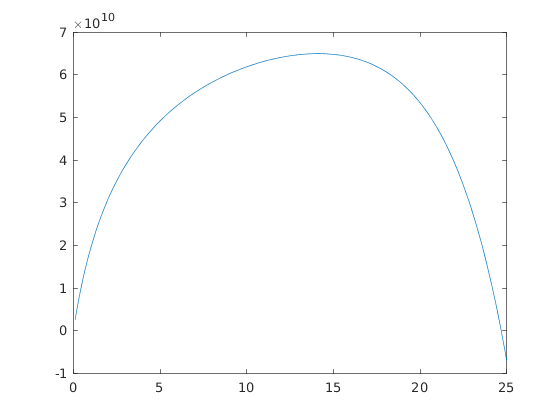

In [10]:
plot(0.1:0.1:25,b)

In [2]:
function [Y,Z] = nextyear(X, k)
    T = [0,0,0,0;1,0,0,0;0,1,0,0;0,0,1,1];
    C = [0,0,0,0;0,0,0,0;0,0,0.42,0;0,0,0,1];
    A = -log(5) * eye(4) - 2 * k / 3 * C;
    A1 = -log(5) * eye(4) - k * C;
    A2 = log(5)*eye(4);
    arr = [0 0 1.109e5/2 1.109e5];
    B  = 3 * arr * A2^(-1) * (eye(4) - expm(-A2/3));
    f = @(x) 1.22e11 * x / (1.22e11 + x);
    Y = T * expm(A) * X + [f(B * expm(2 / 3 * A1) * X);0;0;0];
    weight = [5.07,11.55,17.86,22.99];
    Z = weight * k * C * (A1)^(-1) * (-eye(4) + expm (2/3 * A1)) * X;
end

Error: Function definitions are not permitted in this context.



In [1]:
matlabroot


ans =

    '/usr/local/MATLAB/R2017b'

